In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from dateutil import parser
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [3]:
from manofunkcijos import *

In [4]:
DB = cnt.connect(
    host='88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C = DB.cursor()

In [ ]:
#axis.ticklabel_format(style='plain') iprastas formatas

Rodoma 5 eilutės iš 8360
| 0 |   20-May-87    |     18.63      |
| 1 |   21-May-87    |     18.45      |
| 2 |   22-May-87    |     18.55      |
| 3 |   25-May-87    |      18.6      |
| 4 |   26-May-87    |     18.63      |


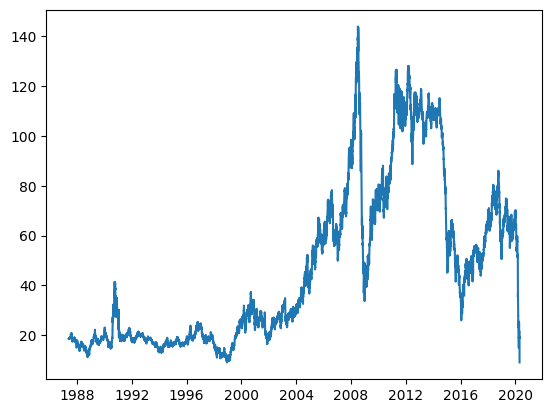

In [15]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select * from BrentOilPrices;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

x2 = []
for date in x:
    z = parser.parse(date)
    x2.append(z)

fig, axis = plt.subplots()

axis.plot(x2,y)

plt.show()

Rodoma 5 eilutės iš 8360
| 0 |   20-May-87    |     18.63      |
| 1 |   21-May-87    |     18.45      |
| 2 |   22-May-87    |     18.55      |
| 3 |   25-May-87    |      18.6      |
| 4 |   26-May-87    |     18.63      |


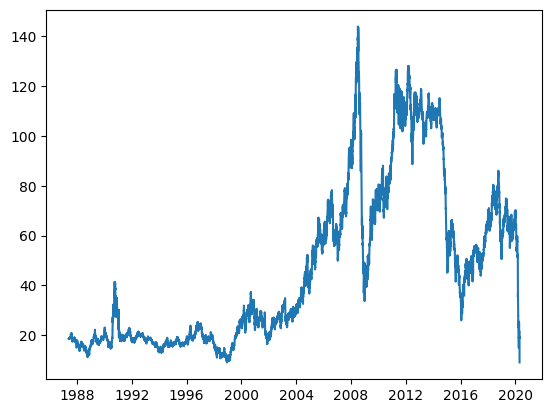

In [16]:
# 1) su plot() nubraižykite BrentOilPrices istorinius duomenis. Duomenis imkite iš SQL lentelės BrentOilPrices.
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select * from BrentOilPrices;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

x2 = []
for date in x:
    z = parser.parse(date)
    x2.append(z)

fig, axis = plt.subplots()

axis.plot(x2,y)

plt.show()
# 2) Pridėkite vartotojo įvestį, kad su input() būtų galima nurodyti metus (nuo, iki), kurių istorinius duomenis norite pamatyti.

Rodoma 5 eilutės iš 258
| 0 |    2-Jan-01    |     23.43      |   2001-01-02   |
| 1 |    3-Jan-01    |     23.44      |   2001-01-03   |
| 2 |    4-Jan-01    |     24.57      |   2001-01-04   |
| 3 |    5-Jan-01    |     24.77      |   2001-01-05   |
| 4 |    8-Jan-01    |     24.75      |   2001-01-08   |


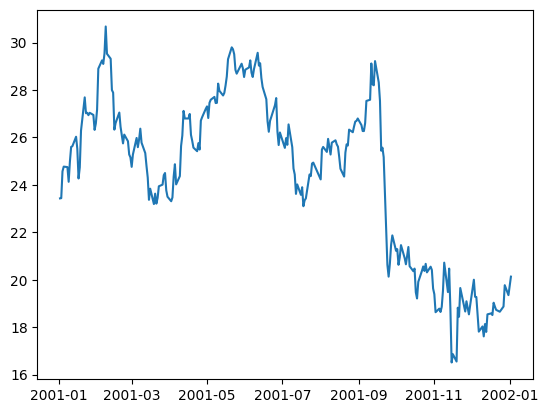

In [46]:
#sql užklausos vykdymas per mysql/mariadb kursorių
nuo= parser.parse(input('nuo?'))
iki = parser.parse(input('Iki?'))
sql="""select Date, Price, str_to_date(Date, '%d-%b-%y')
as DATA
from BrentOilPrices
where str_to_date(Date, '%d-%b-%y')
between %s and %s;"""
C.execute(sql, (nuo, iki))
ans = C.fetchall()
x,y,z = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

fig, axis = plt.subplots()

axis.plot(z,y)

plt.show()

2000-01-01 00:00:00 
 2001-01-01 00:00:00
Rodoma 5 eilutės iš 8360
| 0 |   20-May-87    |     18.63      |
| 1 |   21-May-87    |     18.45      |
| 2 |   22-May-87    |     18.55      |
| 3 |   25-May-87    |      18.6      |
| 4 |   26-May-87    |     18.63      |


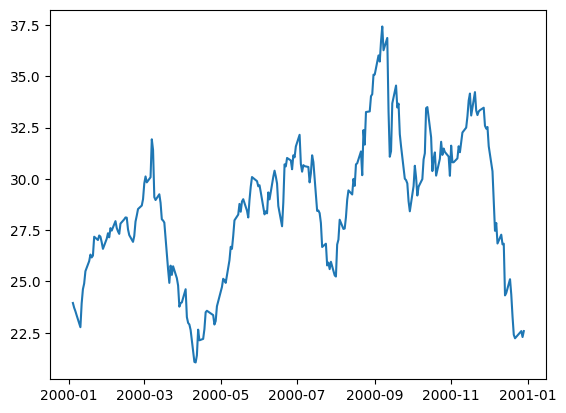

In [24]:
# 2) Pridėkite vartotojo įvestį, kad su input() būtų galima nurodyti metus (nuo, iki), kurių istorinius duomenis norite pamatyti.
datefrom = parser.parse(str(input('Iveskite metus nuo'))+'-01-01')
dateto = parser.parse(str(input("Iveskite metus iki"))+'-01-01')
print(datefrom,'\n',dateto)
sql="""select * from BrentOilPrices;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

x2 = []
for date in x:
    z = parser.parse(date)
    x2.append(z)
x1 = []
y1 =[]
for xdate, val in zip(x2,y):
    if xdate >= datefrom and xdate<= dateto:
        x1.append(xdate)
        y1.append(val)
        

fig, axis = plt.subplots()

axis.plot(x1,y1)

plt.show()




2000 
 2001
select * from BrentOilPrices
where str_to_date(Date,"%d-%M-%y") between "2000-01-01" and "2001-01-01";
Rodoma 5 eilutės iš 253
| 0 |    4-Jan-00    |     23.95      |
| 1 |    5-Jan-00    |     23.72      |
| 2 |    6-Jan-00    |     23.55      |
| 3 |    7-Jan-00    |     23.35      |
| 4 |   10-Jan-00    |     22.77      |


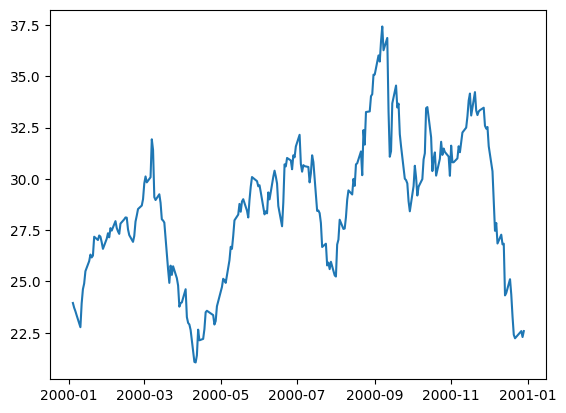

In [33]:
# 3) Pridėkite vartotojo įvestį, kad su input() būtų galima nurodyti metus (nuo, iki), kurių istorinius duomenis norite pamatyti. Filtravimą daryti per sql
datefrom = str(input('Iveskite metus nuo'))
dateto = str(input("Iveskite metus iki"))
print(datefrom,'\n',dateto)
sql=f"""select * from BrentOilPrices
where str_to_date(Date,"%d-%M-%y") between "{datefrom}-01-01" and "{dateto}-01-01";"""
print(sql)
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

x2 = []
for date in x:
    z = parser.parse(date)
    x2.append(z)

        

fig, axis = plt.subplots()

axis.plot(x2,y1)

plt.show()

Rodoma 5 eilutės iš 12
| 0 |      1737      |       1        |
| 1 |      1510      |       2        |
| 2 |      1608      |       3        |
| 3 |      1615      |       4        |
| 4 |      2166      |       5        |


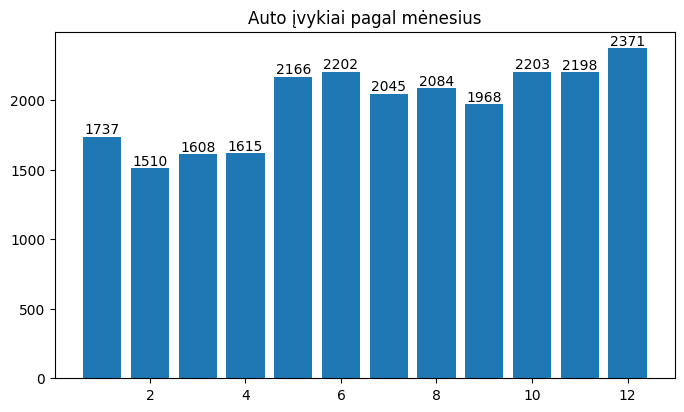

Rodoma 5 eilutės iš 24
| 0 |      467       |       0        |
| 1 |      263       |       1        |
| 2 |      215       |       2        |
| 3 |      183       |       3        |
| 4 |      218       |       4        |


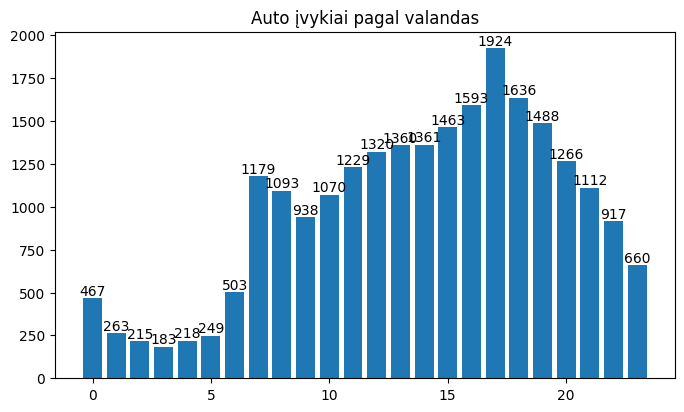

In [56]:
# EismoĮvykiai - kurį mėnesį įvyko daugiausiai eismo įvykių? Pateikite eismo įvykių kiekius su bar arba barh.
sql="""select count(*), month(cast(dataLaikas as datetime)) as M from EismIvyk2021
group by M;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

fig, axis = plt.subplots(figsize = [8,4.5])

a = axis.bar(y, x)
axis.bar_label(a)
axis.set_title('Auto įvykiai pagal mėnesius')
plt.show()
# kuriomis valandomis? Taip pat vizuallizuokite tai su bar arba barh. Stulpelis dataLaikas.
sql="""select count(*), hour(cast(dataLaikas as datetime)) as H from EismIvyk2021
group by H;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

fig, axis = plt.subplots(figsize = [8,4.5])

a = axis.bar(y, x)
axis.bar_label(a)
axis.set_title('Auto įvykiai pagal valandas')
plt.show()

In [49]:

dt_str = '2024-07-22 19:09:27'

date = datetime.datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')

print(date)

2024-07-22 19:09:27


In [51]:
date.month

7

In [52]:
date.hour

19

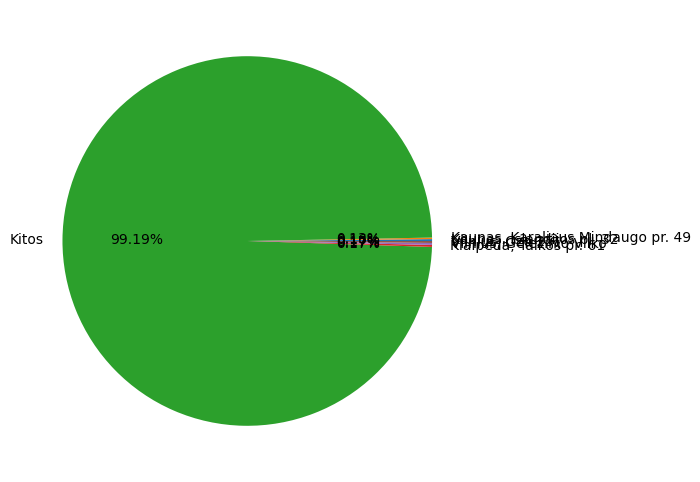

In [57]:
# kokie top 5 adrresai, kuriuose yra daugiausiai eimso įvykių?
# kiek procentų nuo visų įvykių įvyko šiuose 5kiuose adresuose?
#procentinę vizulizaciją pateikite su pie plot.
sql="""select 
case
when ivykioVieta in (select * from(select ivykioVieta from EismIvyk2021 group by ivykioVieta order by count(*) desc limit 5)as f) then ivykioVieta
else 'Kitos'
end as Vieta, count(*) as r
from EismIvyk2021
group by Vieta;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
fig, axis = plt.subplots(figsize = [20,6])

axis.pie(y, labels=x, autopct = '%.2f%%')

plt.show()

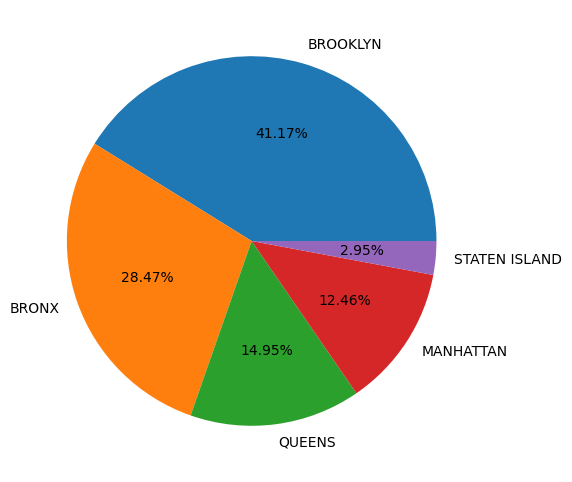

Rodoma 5 eilutės iš 24
| 0 |       23       |      2014      |
| 1 |       0        |      1928      |
| 2 |       22       |      1886      |
| 3 |       1        |      1877      |
| 4 |       21       |      1733      |


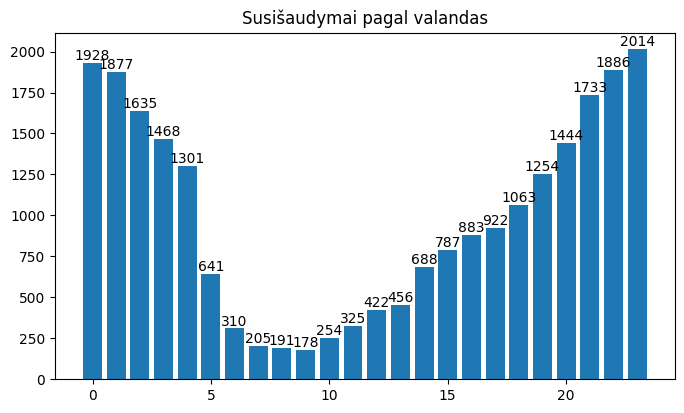

Rodoma 5 eilutės iš 24
| 0 |       22       |      385       |
| 1 |       0        |      329       |
| 2 |       1        |      328       |
| 3 |       21       |      326       |
| 4 |       23       |      322       |


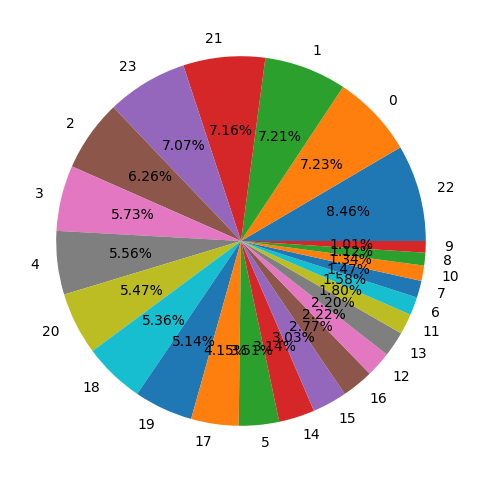

In [6]:
# Suraskite, kuriuose rajonuose įvyksta daugiausiai susišaudymų? Vizualizuokite.
sql="""select BORO, count(*) from nypd
group by BORO
order BY count(*) desc;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
fig, axis = plt.subplots(figsize = [20,6])

axis.pie(y, labels=x, autopct = '%.2f%%')

plt.show()
# suraskite, kuriomis valandomis įvyksta daugiausiai susišaudymų? Vizualizuokite.
sql="""select hour(cast(OCCUR_TIME as time)) as t, count(*) from nypd
group by t order by count(*) desc;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

# fig, axis = plt.subplots(figsize = [20,6])

# axis.pie(y, labels=x, autopct = '%.2f%%')

# plt.show()
fig, axis = plt.subplots(figsize = [8,4.5])

a = axis.bar(x, y)
axis.bar_label(a)
axis.set_title('Susišaudymai pagal valandas')
plt.show()
# Kuriomis valandomis (procentiškai) įvyksta daugiausiai mirtinų susišaudymų? Vizualizuokite.
sql="""select hour(cast(OCCUR_TIME as time)) as t, count(*) from nypd
where STATISTICAL_MURDER_FLAG = 1
group by t order by count(*) desc;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

fig, axis = plt.subplots(figsize = [20,6])

axis.pie(y, labels=x, autopct = '%.2f%%')

plt.show()
# fig, axis = plt.subplots(figsize = [8,4.5])

# a = axis.bar(x, y)
# axis.bar_label(a)
# axis.set_title('Mirtini susišaudymai pagal valandas')
# plt.show()

| 0 |     BLACK      |       M        |     25-44      |     BLACK      |       M        |     25-44      |      1376      |
| 1 |     BLACK      |       M        |     18-24      |     BLACK      |       M        |     18-24      |      1320      |
| 2 |     BLACK      |       M        |     18-24      |     BLACK      |       M        |     25-44      |      1013      |
| 3 |     BLACK      |       M        |     25-44      |     BLACK      |       M        |     18-24      |      658       |
| 4 |     BLACK      |       M        |     18-24      |     BLACK      |       M        |      <18       |      350       |


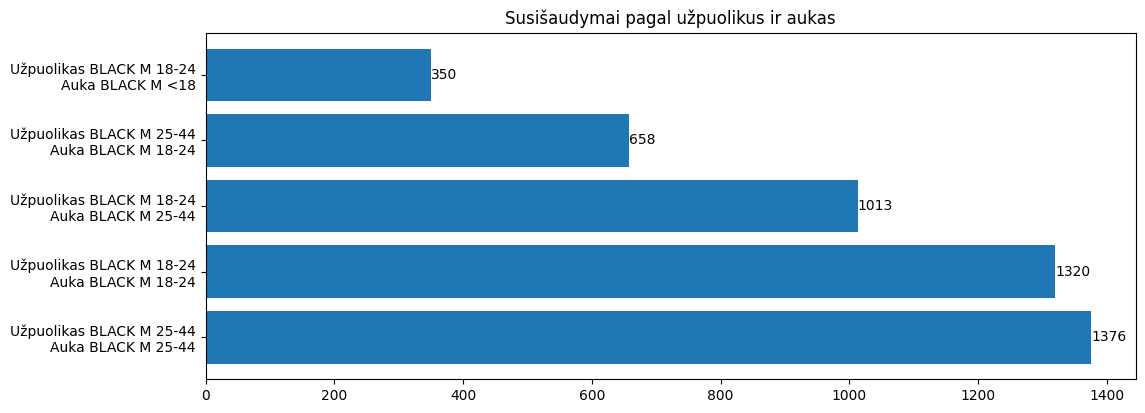

In [23]:
# turite informaciją apie užpuoliko lytį, amžiaus grupę, rasę, bei tą pačią infromaciją apie auką. 
# kokia vyraujanti aukos rasė, amžiaus grupė, lytis, užpuoliko amž grupė, rasė, lytis?
# Ar užpuolikai renkasi savo amžiaus, lyties, rasės aukas ar ne?

sql="""select PERP_RACE as PR, PERP_SEX, PERP_AGE_GROUP, VIC_RACE, VIC_SEX, VIC_AGE_GROUP, count(*) from nypd
where PERP_RACE<> '' and PERP_RACE <> 'UNKNOWN' and PERP_AGE_GROUP <> 'UNKNOWN'
group by PERP_RACE, PERP_SEX, PERP_AGE_GROUP, VIC_RACE, VIC_SEX, VIC_AGE_GROUP
order by count(*) desc limit 5;"""
C.execute(sql)
ans = C.fetchall()
a, b, c, d, e, f, g = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
x = []
for q, e, r, t, y, u in zip(a,b,c,d,e,f):
    s = 'Užpuolikas '+q+' '+e+' '+r+'\nAuka '+t+' '+y+' '+u
    x.append(s)


fig, axis = plt.subplots(figsize = [12,4.5])

a = axis.barh(x, g)
axis.bar_label(a)
axis.set_title('Susišaudymai pagal užpuolikus ir aukas')
plt.show()